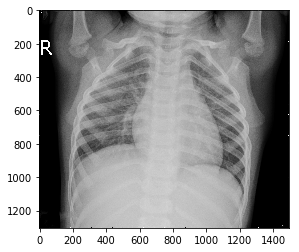

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "chest_xray/train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
img_array.shape

(1304, 1496)

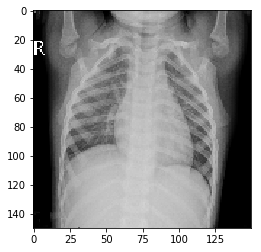

In [6]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [17]:
print(len(training_data))

5216


In [20]:
import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
1
1
1
1


In [22]:
X = []
y = []

In [23]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [42]:
print(len(X),len(y))

5216 5216


In [43]:
import pickle

pickle_out = open("x_train.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [60]:
DATADIR2 = "chest_xray/test"
CATEGORIES2 = ["NORMAL", "PNEUMONIA"]

test_data = []


def create_test_data():
    for category in CATEGORIES2:
        path = os.path.join(DATADIR2, category)
        class_num = CATEGORIES2.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_test_data()

In [66]:
print(len(test_data))

602


In [67]:
x_test = []
y_test = []

for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [69]:
x_test.shape

(602, 150, 150, 1)

In [70]:
pickle_out = open("x_test.pickle", "wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [71]:
DATADIR3 = "chest_xray/val"
CATEGORIES3 = ["NORMAL", "PNEUMONIA"]

validation_data = []


def create_validation_data():
    for category in CATEGORIES3:
        path = os.path.join(DATADIR3, category)
        class_num = CATEGORIES3.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_validation_data()

In [72]:
print(len(validation_data))

16


In [73]:
x_val = []
y_val = []

for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)
    
x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [74]:
x_val.shape

(16, 150, 150, 1)

In [75]:
pickle_out = open("x_val.pickle", "wb")
pickle.dump(x_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()